# 1. Imports

In [1150]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [1151]:
SEED = 547586

np.random.seed(SEED)


# 2. Breast Cancer Wisconsin (Diagnostic) dataset


In [1152]:
df = pd.read_csv("data/wdbc.data", sep=",", header=None)
df = df.sample(frac=1).reset_index(drop=True)
df


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
1,8811842,M,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255
2,91930402,M,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,23.23,27.15,152.00,1645.0,0.10970,0.25340,0.30920,0.16130,0.3220,0.06386
3,9013594,B,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
4,889719,M,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,...,21.58,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,915452,B,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,...,17.32,17.76,109.80,928.2,0.13540,0.13610,0.19470,0.13570,0.2300,0.07230
565,894855,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553
566,886226,M,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,...,25.70,24.57,163.10,1972.0,0.14970,0.31610,0.43170,0.19990,0.3379,0.08950
567,875093,B,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871


In [1153]:
df[1].unique()  # target


array(['B', 'M'], dtype=object)

In [1154]:
df_len = df.shape[0]
train_size = int(df_len*0.75)

df_train = df.iloc[:train_size, :]
df_test = df.iloc[train_size:, :]

print(df_train.shape)


(426, 32)


From now, we will changing only df_train without df_test because we want to check how models accuracy will change.


In [1155]:
x_train = df_train.drop(1, axis=1)
y_train = df_train[1]

x_test = df_test.drop(1, axis=1)
y_test = df_test[1]


### 2.1. Test on Random Forest Classifier without missing values

In [1156]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc:", acc)


RandomForestClassifier acc: 0.958041958041958


### 2.2. Test on Random Forest Classifier with missing values (1%)


In [1157]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

df_train_1p = df_train_1p.dropna()
print(df_train_1p.shape)

x_train_1p = df_train_1p.drop(1, axis=1)
y_train_1p = df_train_1p[1]


(317, 32)


In [1158]:
model = RandomForestClassifier()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

acc_1p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (1%)", acc_1p)


RandomForestClassifier acc: (1%) 0.9370629370629371


### 2.3. Test on Random Forest Classifier with missing values (5%)


In [1159]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.05).index, col] = np.nan

df_train_5p = df_train_5p.dropna()
print(df_train_5p.shape)

x_train_5p = df_train_5p.drop(1, axis=1)
y_train_5p = df_train_5p[1]


(81, 32)


In [1160]:
model = RandomForestClassifier()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

acc_5p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (5%)", acc_5p)


RandomForestClassifier acc: (5%) 0.9230769230769231


### 2.4. Test on Random Forest Classifier with missing values (10%)


In [1161]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.10).index, col] = np.nan

df_train_10p = df_train_10p.dropna()
print(df_train_10p.shape)

x_train_10p = df_train_10p.drop(1, axis=1)
y_train_10p = df_train_10p[1]


(14, 32)


In [1162]:
model = RandomForestClassifier()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

acc_10p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (10%)", acc_10p)


RandomForestClassifier acc: (10%) 0.9020979020979021


### Summary of deleting records with missing values

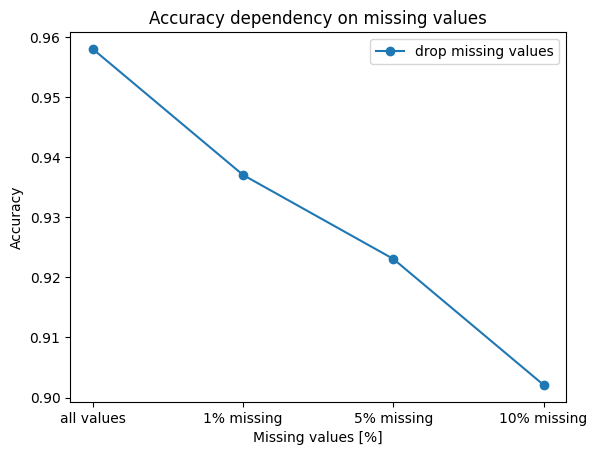

In [1163]:
acc_droped = [acc, acc_1p, acc_5p, acc_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, acc_droped, marker="o", label="drop missing values")

plt.title("Accuracy dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


The graph tells us that the higher the percentage of missing data, the worse the model performs.

This is due to the fact that we have fewer and fewer records to train the model.

### 2.5. Test on Random Forest Classifier with missing values (1%) - replace with mean value


In [1164]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

for column in df_train_1p.columns:
    if pd.api.types.is_numeric_dtype(df_train_1p[column]):
        df_train_1p[column].fillna(df_train_1p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_1p[column].fillna(df_train_1p[column].mode()[0], inplace=True)

x_train_1p = df_train_1p.drop(1, axis=1)
y_train_1p = df_train_1p[1]


In [1165]:
model = RandomForestClassifier()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

acc_1p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (1%)", acc_1p)


RandomForestClassifier acc: (1%) 0.951048951048951


### 2.6. Test on Random Forest Classifier with missing values (5%) - replace with mean value


In [1166]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.01).index, col] = np.nan

for column in df_train_5p.columns:
    if pd.api.types.is_numeric_dtype(df_train_5p[column]):
        df_train_5p[column].fillna(df_train_5p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_5p[column].fillna(df_train_5p[column].mode()[0], inplace=True)

x_train_5p = df_train_5p.drop(1, axis=1)
y_train_5p = df_train_5p[1]


In [1167]:
model = RandomForestClassifier()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

acc_5p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (5%)", acc_5p)


RandomForestClassifier acc: (5%) 0.958041958041958


### 2.7. Test on Random Forest Classifier with missing values (10%) - replace with mean value


In [1168]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.01).index, col] = np.nan

for column in df_train_10p.columns:
    if pd.api.types.is_numeric_dtype(df_train_10p[column]):
        df_train_10p[column].fillna(df_train_10p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_10p[column].fillna(df_train_10p[column].mode()[0], inplace=True)

x_train_10p = df_train_10p.drop(1, axis=1)
y_train_10p = df_train_10p[1]


In [1169]:
model = RandomForestClassifier()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

acc_10p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (10%)", acc_10p)


RandomForestClassifier acc: (10%) 0.951048951048951


### Summary of deleting records and replacing records with missing values

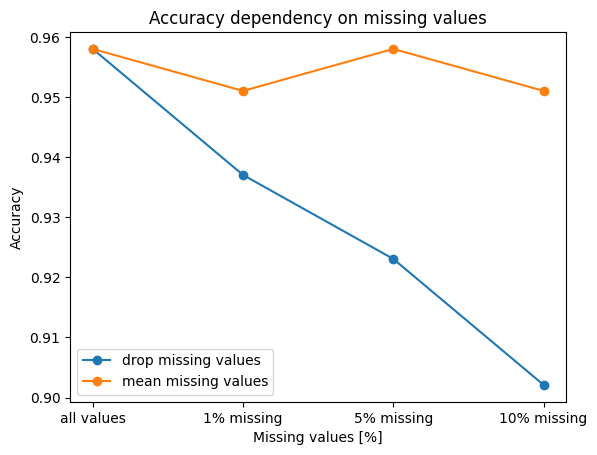

In [1170]:
acc_mean = [acc, acc_1p, acc_5p, acc_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, acc_droped, marker="o", label="drop missing values")
plt.plot(x, acc_mean, marker="o", label="mean missing values")

plt.title("Accuracy dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


As you can see in the chart, regardless of whether we replace the missing values with the average value from the column or delete given records, the effectiveness of the model slightly decreases, although it does not have a significant impact.

Personally, I think that the data is quite simple and hence the impact of missing records on the high performance of the model is small.

I also believe that averaging the result is better than deleting records and should impact the model better.

# 3. Breast Cancer Wisconsin (Diagnostic) dataset

In [1171]:
df = pd.read_csv("data/boston.data", sep=",")
df = df.sample(frac=1).reset_index(drop=True)
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,5.82115,0.0,18.10,0,0.7130,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,20.2
1,0.05188,0.0,4.49,0,0.4490,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5
2,0.06076,0.0,11.93,0,0.5730,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
3,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
4,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,4.64689,0.0,18.10,0,0.6140,6.980,67.6,2.5329,24,666,20.2,374.68,11.66,29.8
502,0.04294,28.0,15.04,0,0.4640,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
503,0.44178,0.0,6.20,0,0.5040,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
504,0.22969,0.0,10.59,0,0.4890,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4


In [1172]:
df["medv"].describe()  # target


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [1173]:
df_len = df.shape[0]
train_size = int(df_len*0.75)

df_train = df.iloc[:train_size, :]
df_test = df.iloc[train_size:, :]

print(df_train.shape)


(379, 14)


From now, we will changing only df_train without df_test because we want to check how models accuracy will change.


In [1174]:
x_train = df_train.drop("medv", axis=1)
y_train = df_train["medv"]

x_test = df_test.drop("medv", axis=1)
y_test = df_test["medv"]


### 3.1. Test on Random Forest Regressor without missing values


In [1175]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE:", mse)


RandomForestRegressor MSE: 7.349585110236215


### 3.2. Test on Random Forest Regressor with missing values (1%)


In [1176]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

df_train_1p = df_train_1p.dropna()
print(df_train_1p.shape)

x_train_1p = df_train_1p.drop("medv", axis=1)
y_train_1p = df_train_1p["medv"]


(325, 14)


In [1177]:
model = RandomForestRegressor()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

mse_1p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (1%):", mse_1p)


RandomForestRegressor MSE (1%): 7.652550677165348


### 3.3. Test on Random Forest Regressor with missing values (5%)


In [1178]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.05).index, col] = np.nan

df_train_5p = df_train_5p.dropna()
print(df_train_5p.shape)

x_train_5p = df_train_5p.drop("medv", axis=1)
y_train_5p = df_train_5p["medv"]


(183, 14)


In [1179]:
model = RandomForestRegressor()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

mse_5p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (5%):", mse_5p)


RandomForestRegressor MSE (5%): 9.030513385826765


### 3.4. Test on Random Forest Regressor with missing values (10%)


In [1180]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.1).index, col] = np.nan

df_train_10p = df_train_10p.dropna()
print(df_train_10p.shape)

x_train_10p = df_train_10p.drop("medv", axis=1)
y_train_10p = df_train_10p["medv"]


(82, 14)


In [1181]:
model = RandomForestRegressor()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

mse_10p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (10%):", mse_10p)


RandomForestRegressor MSE (10%): 12.200324763779513


### Summary of deleting records with missing values

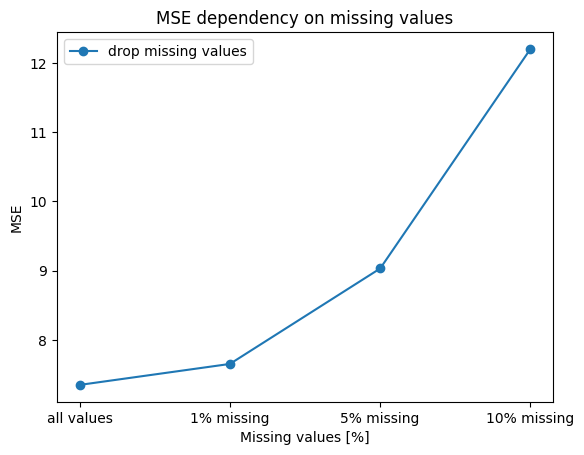

In [1182]:
mse_droped = [mse, mse_1p, mse_5p, mse_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, mse_droped, marker="o", label="drop missing values")

plt.title("MSE dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("MSE")
plt.legend()

plt.show()


### 3.5. Test on Random Forest Regressor with missing values (1%) - replace with mean value


In [1183]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

for column in df_train_1p.columns:
    if pd.api.types.is_numeric_dtype(df_train_1p[column]):
        df_train_1p[column].fillna(df_train_1p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_1p[column].fillna(df_train_1p[column].mode()[0], inplace=True)

x_train_1p = df_train_1p.drop("medv", axis=1)
y_train_1p = df_train_1p["medv"]


In [1184]:
model = RandomForestRegressor()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

mse_1p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (1%):", mse_1p)


RandomForestRegressor MSE (1%): 7.63959836550691


### 3.6. Test on Random Forest Regressor with missing values (5%) - replace with mean value


In [1185]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.05).index, col] = np.nan

for column in df_train_5p.columns:
    if pd.api.types.is_numeric_dtype(df_train_5p[column]):
        df_train_5p[column].fillna(df_train_5p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_5p[column].fillna(df_train_5p[column].mode()[0], inplace=True)

x_train_5p = df_train_5p.drop("medv", axis=1)
y_train_5p = df_train_5p["medv"]


In [1186]:
model = RandomForestRegressor()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

mse_5p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (5%):", mse_5p)


RandomForestRegressor MSE (5%): 8.0768870047244


### 3.7. Test on Random Forest Regressor with missing values (10%) - replace with mean value


In [1187]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.05).index, col] = np.nan

for column in df_train_10p.columns:
    if pd.api.types.is_numeric_dtype(df_train_10p[column]):
        df_train_10p[column].fillna(df_train_10p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_10p[column].fillna(df_train_10p[column].mode()[0], inplace=True)

x_train_10p = df_train_10p.drop("medv", axis=1)
y_train_10p = df_train_10p["medv"]


In [1188]:
model = RandomForestRegressor()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

mse_10p = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor MSE (5%):", mse_10p)


RandomForestRegressor MSE (5%): 10.427498122125986


### Summary of deleting records and replacing records with missing values

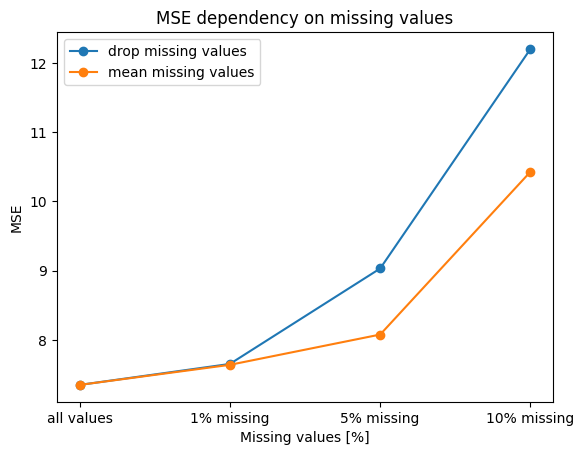

In [1190]:
mse_mean = [mse, mse_1p, mse_5p, mse_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, mse_droped, marker="o", label="drop missing values")
plt.plot(x, mse_mean, marker="o", label="mean missing values")

plt.title("MSE dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("MSE")
plt.legend()

plt.show()


Similarly to the previous data set, we can see that the method of replacing missing values instead of deleting records is better (the MSE is smaller).

# 4. Summary

To summarize the entire lab, missing data is a noticeable problem for models.

Because we have to delete or artificially fill such records, the effectiveness of the model regularly decreases as the percentage of missing data increases.